# Telecom Churn Case Study

## Data Understanding and Preparation

### Importing the Data

In [1]:
# libraries and packages will be added to this cell as and when they are needed.
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Inspecting the Dataframe

In [5]:
df.shape

(99999, 226)

In [6]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
df.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

##### As we can see from the isnull() and the head() function, a lot of these columns have NaNs or null values

###### Checking the percentage of missing values

In [9]:
df_missing_values = (df.isnull().sum()/len(df.index)*100).sort_values(ascending=False)
df_missing_values

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

Since a lot of these columns are very important, instead of dropping them, we will impute the null values with 0

In [10]:
df = df.fillna(0)

Checking if the imputation has been done successfully

In [11]:
df.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou              0
std_og_t2o_mou              0
loc_ic_t2o_mou              0
last_date_of_month_6        0
last_date_of_month_7        0
last_date_of_month_8        0
last_date_of_month_9        0
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
onnet_mou_9                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
offnet_mou_9                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_ic_mou_9               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
roam_og_mou_9               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2t_mou_9            0
loc_og_t2m

### Selecting the High-Value Customers

In [12]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount 
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6 
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7 
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount 
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6 
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2


##### finding the 70th of the avg_rech_amt

In [13]:
X = df.av_amt_data_6_7.quantile(0.7)
X

478.0

##### filtering the data to be greater than or equal to the 70th percentile

In [14]:
df = df[df.av_amt_data_6_7 >= X]
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

##### checking the shape to ensure that the data has been reduced

In [15]:
df.shape

(30001, 231)

as we can see, we have ~30,000 rows

##### deleting the columns which are not needed

In [16]:
# the columns with include date and the circle_id will be dropped.
df = df.drop(columns=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9','date_of_last_rech_data_6',
                      'date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9','circle_id','mobile_number'])
df.shape

(30001, 217)

In [17]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212

### Tagging churn

In [18]:
df['churn'] = np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [19]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.

#### dropping all the attributes of the churn phase

In [20]:
columns_with_9 = [col for col in df.columns if '_9' in col]
columns_with_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9']

In [21]:
df = df.drop(columns=columns_with_9,axis=1)

In [22]:
df.shape

(30001, 167)

In [23]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,8

### Deriving Features

In [24]:
# checking the average mou in good phase(6 and 7)
df['avg_mou_good'] = (df['total_og_mou_6'] + df['total_og_mou_7'] + df['total_ic_mou_6'] + df['total_ic_mou_7'])/2

# checking the mou in the action phase(8)
df['mou_action'] = df['total_ic_mou_8'] + df['total_og_mou_8']

# checking if there has been a decrease in mou between good and action phase and mapping them
df['mou_decrease'] = np.where((df['mou_action']-df['avg_mou_good'] < 0), 1, 0)

In [25]:
# checking the average recharge amount in good phase(6 and 7)
df['avg_rech_amt_good'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

df['rech_amt_action'] = df['total_rech_amt_8']

# checking if there has been a decrease in recharge amount between good and action phase and mapping them
df['rech_amt_decrease'] = np.where((df['rech_amt_action']-df['avg_rech_amt_good'] < 0), 1, 0)

In [26]:
# checking the average recharge number in good phase(6 and 7)
df['avg_rech_num_good'] = (df['total_rech_num_6'] + df['total_rech_num_7'])/2

df['rech_num_action'] = df['total_rech_num_8']

# checking if there has been a decrease in recharge number between good and action phase and mapping them
df['rech_num_decrease'] = np.where((df['rech_num_action']-df['avg_rech_num_good'] < 0), 1, 0)

In [27]:
# checking the arpu in good phase(6 and 7)
df['avg_arpu_good'] = (df['arpu_6'] + df['arpu_7'])/2

df['arpu_action'] = df['arpu_8']

# checking if there has been a decrease in arpu between good and action phase and mapping them
df['arpu_decrease'] = np.where((df['arpu_action']-df['avg_arpu_good'] < 0), 1, 0)

In [28]:
# checking the avg max recharge aamount in good phase(6 and 7)
df['max_rech_amt_good'] = (df['max_rech_amt_6'] + df['max_rech_amt_7'])/2

df['max_rech_amt_action'] = df['max_rech_amt_8']

# checking if there has been a decrease in max recharge amount between good and action phase and mapping them
df['max_rech_amt_decrease'] = np.where((df['max_rech_amt_action']-df['max_rech_amt_good'] < 0), 1, 0)

In [29]:
# checking the avg vbc_3g in good phase(6 and 7)
df['vbc_3g_good'] = (df['jun_vbc_3g'] + df['jul_vbc_3g'])/2

df['vbc_3g_action'] = df['aug_vbc_3g']

# checking if there has been a decrease in vbc_3g between good and action phase and mapping them
df['vbc_3g_decrease'] = np.where((df['vbc_3g_action']-df['vbc_3g_good'] < 0), 1, 0)

## EDA

In [30]:
df.dtypes

loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64
loc_og_mou

### Uni-Variate analysis

In [31]:
def count_plot_uni(column):
    plt.figure(figsize = (15,5))
    ax=sns.countplot(x = column, data = df)
    plt.xticks(rotation = 90)
    plt.title(column,fontsize=20)
    plt.show()

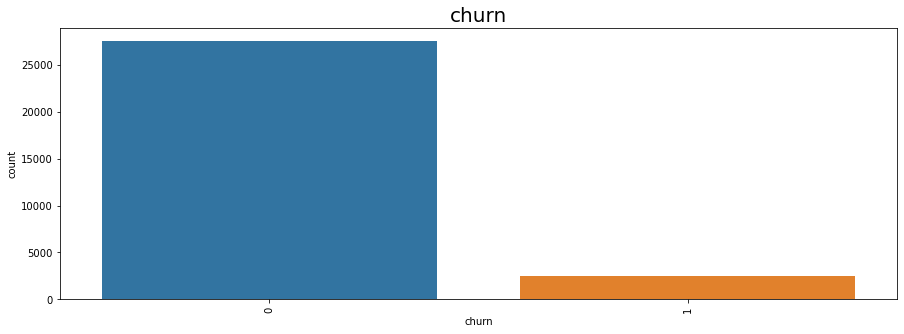

In [32]:
count_plot_uni('churn')

As can be seen in this table, there is a lot of data imbalance in the churn column that must be dealt with. But before we deal with this, let's check some other columns

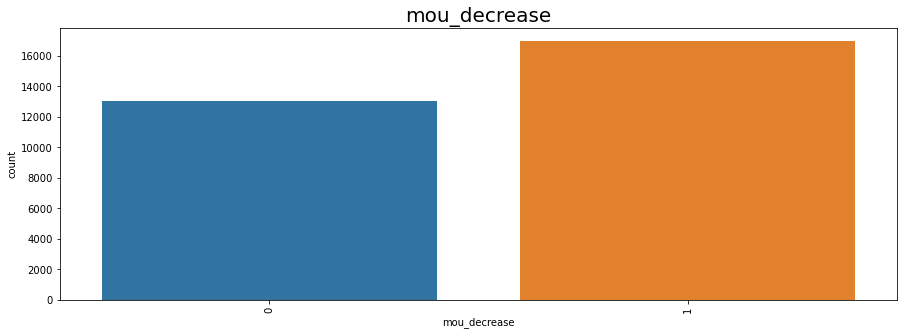

In [33]:
count_plot_uni('mou_decrease')

As can be seen in the above count_plot, there has been a substantial decrease in the MOU from good phase to action phase

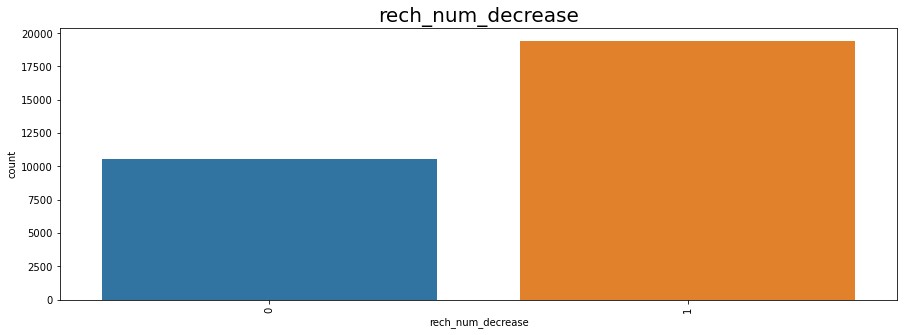

In [34]:
count_plot_uni('rech_num_decrease')

There's a substantial decrease in the recharge amount

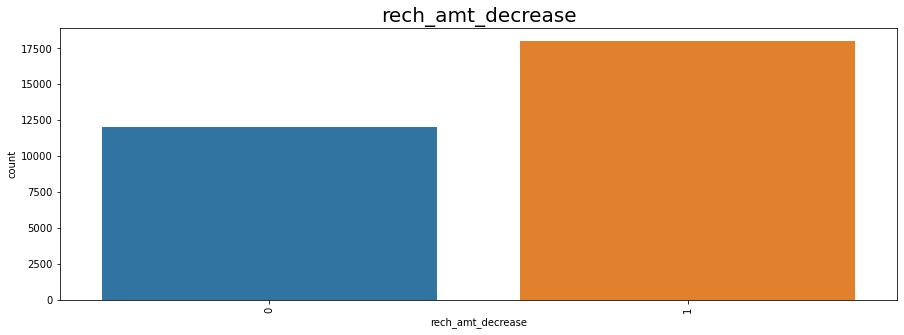

In [35]:
count_plot_uni('rech_amt_decrease')

Again, there has been a large decrease in the recharge amount

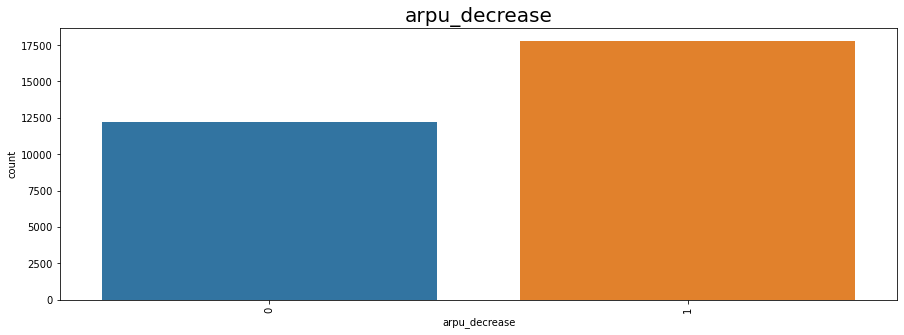

In [36]:
count_plot_uni('arpu_decrease')

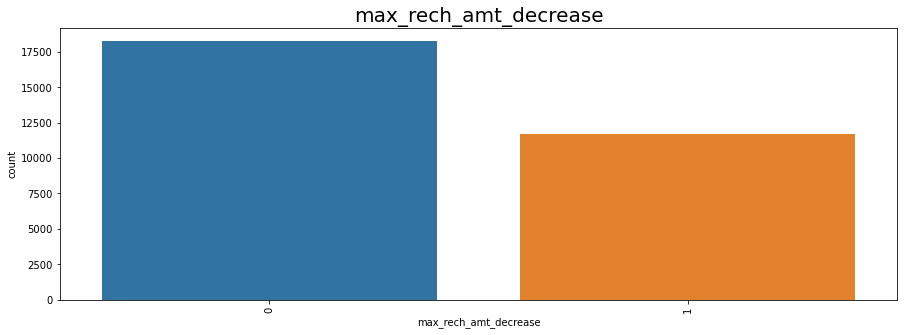

In [37]:
count_plot_uni('max_rech_amt_decrease')

There is a decrease in the max recharge amount, but it is less than half. So it isn't as much as the above columns

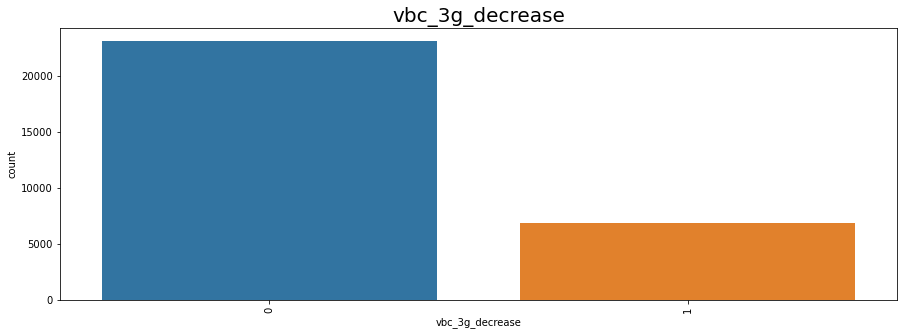

In [38]:
count_plot_uni('vbc_3g_decrease')

there is a decrease in the vbc_3g from good to action phase but it is very less compared to the others

### Bi-Variate Analysis

In [39]:
def count_plot_bivariate(column):
    plt.figure(figsize = (15,5))
    ax=sns.countplot(x = column, hue = "churn", data = df)
    plt.xticks(rotation = 90)
    plt.title(column,fontsize=20)
    plt.show()

Checking the above features with respect to churn

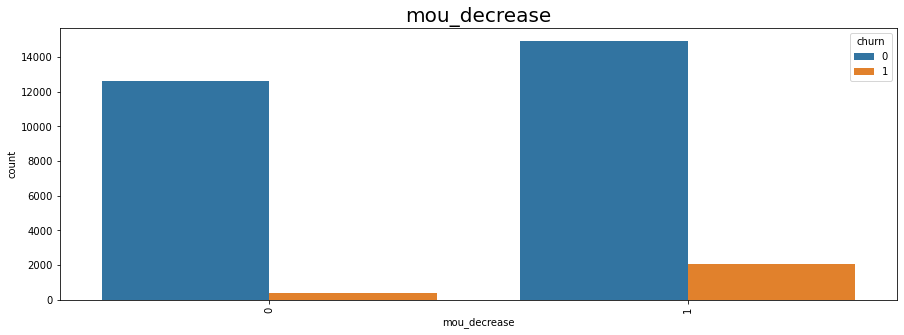

In [40]:
count_plot_bivariate('mou_decrease')

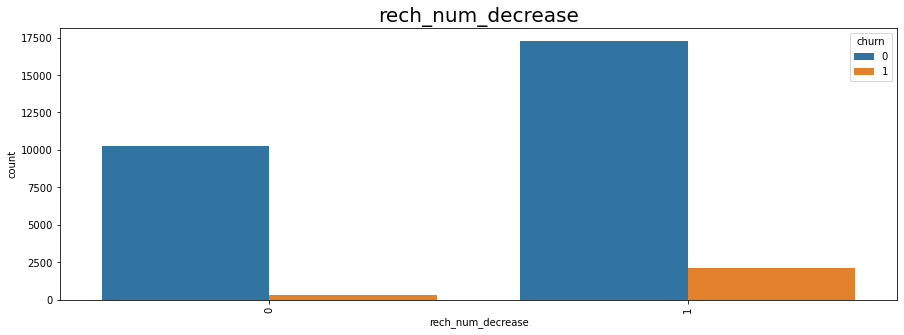

In [41]:
count_plot_bivariate('rech_num_decrease')

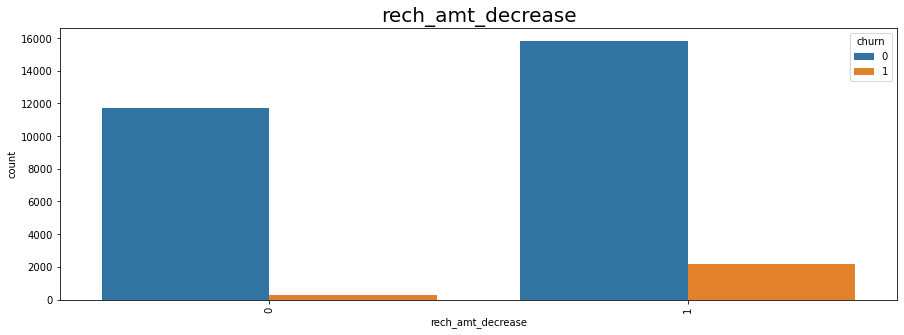

In [42]:
count_plot_bivariate('rech_amt_decrease')

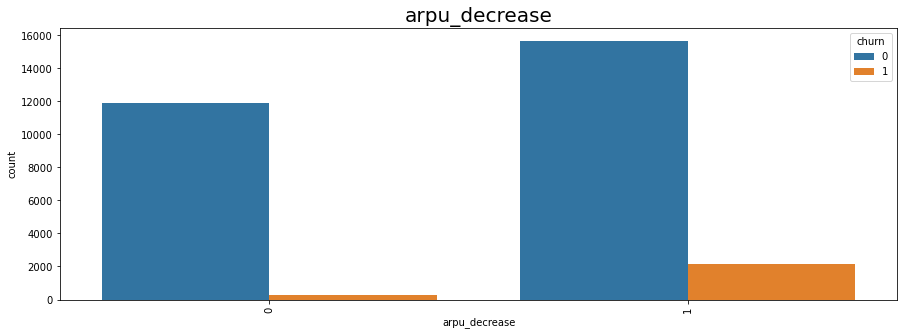

In [43]:
count_plot_bivariate('arpu_decrease')

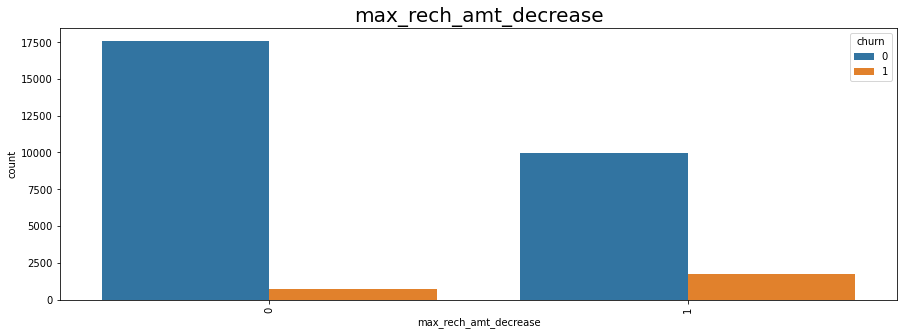

In [44]:
count_plot_bivariate('max_rech_amt_decrease')

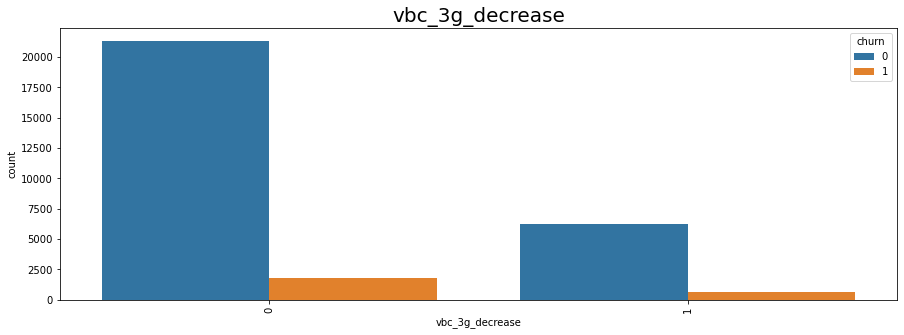

In [45]:
count_plot_bivariate('vbc_3g_decrease')

In [46]:
df_select = df[['avg_mou_good','mou_action','mou_decrease','avg_rech_amt_good','rech_amt_action','rech_amt_decrease','avg_rech_num_good',
'rech_num_action','rech_num_decrease','avg_arpu_good','arpu_action','arpu_decrease','vbc_3g_good','vbc_3g_action','vbc_3g_decrease',
               'max_rech_amt_good','max_rech_amt_action','max_rech_amt_decrease']]

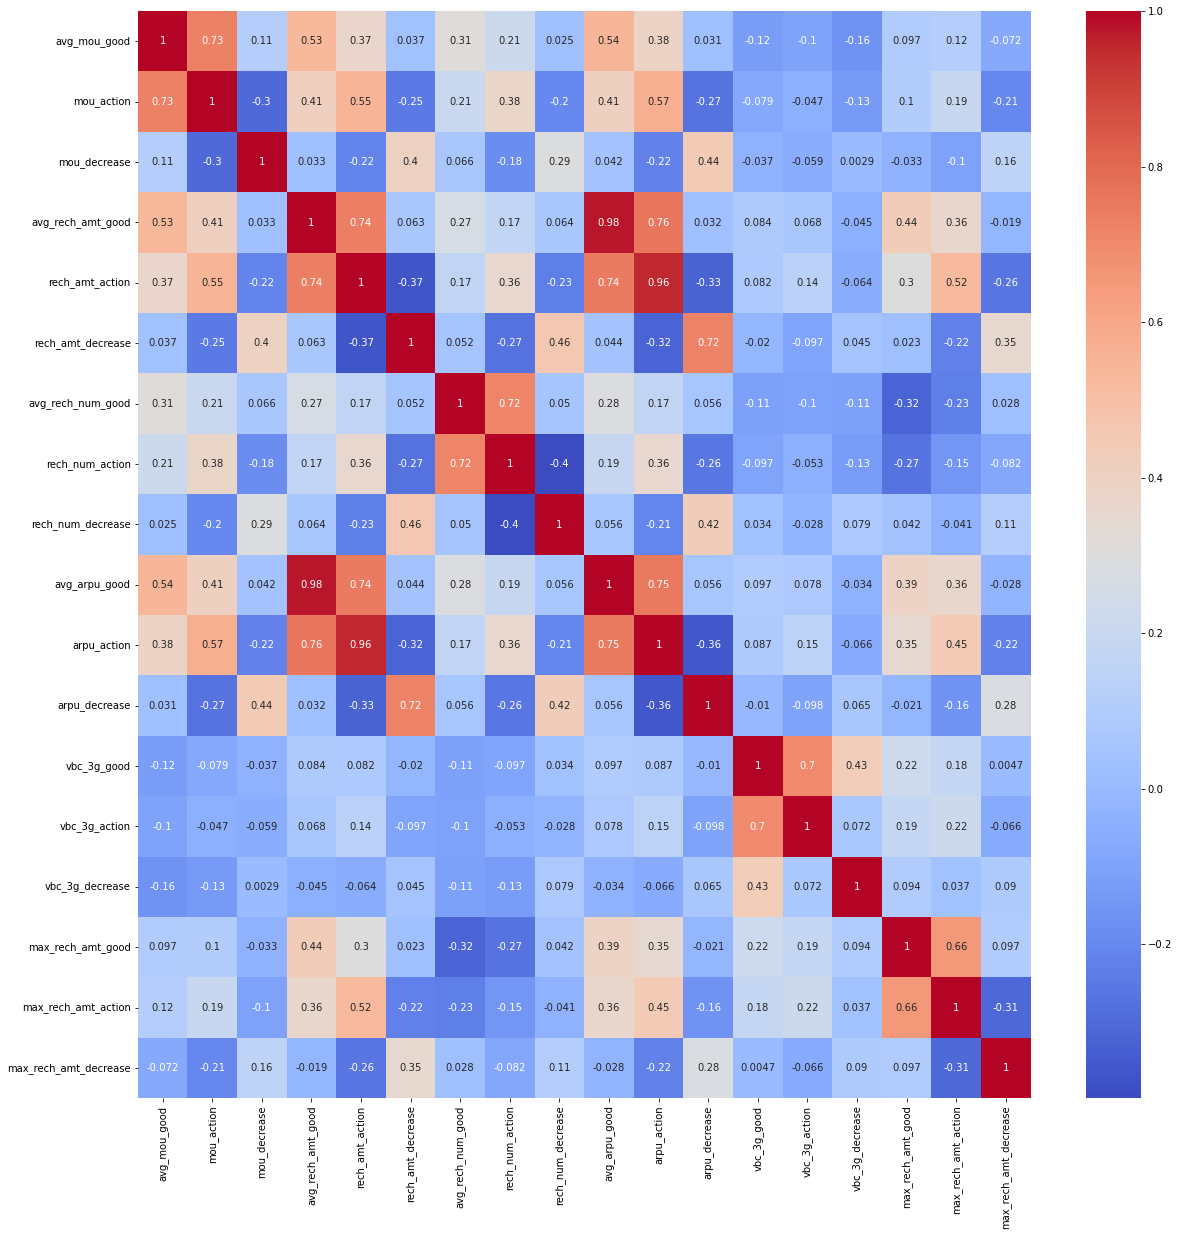

In [47]:
# checking out the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(data=df_select.corr(), annot = True, cmap="coolwarm")
plt.show()

## Train-Test Split

In [48]:
X = df.drop(columns='churn', axis =1)

In [49]:
y = df['churn']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [51]:
#checking the shape of the X_train and y_train
print(X_train.shape)
print(y_train.shape)

(21000, 184)
(21000,)


as we can see above, there are 21k rows in the training data. thus, the split was done perfectly.

## Dealing with data imbalance

In [52]:
smote = SMOTE(random_state=42)

In [53]:
#fitting smote to the train set
X_train, y_train = smote.fit_resample(X_train, y_train)

## Feature Scaling using a Standard Scaler

In [54]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38520 entries, 0 to 38519
Data columns (total 184 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    loc_og_t2o_mou         float64
 1    std_og_t2o_mou         float64
 2    loc_ic_t2o_mou         float64
 3    arpu_6                 float64
 4    arpu_7                 float64
 5    arpu_8                 float64
 6    onnet_mou_6            float64
 7    onnet_mou_7            float64
 8    onnet_mou_8            float64
 9    offnet_mou_6           float64
 10   offnet_mou_7           float64
 11   offnet_mou_8           float64
 12   roam_ic_mou_6          float64
 13   roam_ic_mou_7          float64
 14   roam_ic_mou_8          float64
 15   roam_og_mou_6          float64
 16   roam_og_mou_7          float64
 17   roam_og_mou_8          float64
 18   loc_og_t2t_mou_6       float64
 19   loc_og_t2t_mou_7       float64
 20   loc_og_t2t_mou_8       float64
 21   loc_og_t2m_mou_6       float64
 2

In [55]:
numeric_columns = X_train.columns.to_list()

In [56]:
scaler = StandardScaler()

In [57]:
numeric_columns.remove('vbc_3g_decrease')
numeric_columns.remove('max_rech_amt_decrease')
numeric_columns.remove('arpu_decrease')
numeric_columns.remove('rech_num_decrease')
numeric_columns.remove('rech_amt_decrease')
numeric_columns.remove('mou_decrease')

In [58]:
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7,avg_mou_good,mou_action,mou_decrease,avg_rech_amt_good,rech_amt_action,rech_amt_decrease,avg_rech_num_good,rech_num_action,rech_num_decrease,avg_arpu_good,arpu_action,arpu_decrease,max_rech_amt_good,max_rech_amt_action,max_rech_amt_decrease,vbc_3g_good,vbc_3g_action,vbc_3g_decrease
0,0.0,0.0,0.0,-0.128756,0.186369,-0.793821,-0.505259,-0.415628,-0.441346,-0.743164,-0.678159,-0.575126,-0.22252,-0.216585,-0.213182,-0.243285,-0.255987,-0.231295,-0.185394,-0.001088,-0.292403,-0.576690,-0.548349,-0.500922,-0.222918,-0.099401,-0.247593,-0.265582,-0.204871,-0.226587,-0.506662,-0.366219,-0.511502,-0.438653,-0.424327,-0.329861,-0.488132,-0.447467,-0.344931,-0.145300,-0.131104,-0.117033,0.0,0.0,0.0,-0.634919,-0.594381,-0.445656,-0.068102,-0.060356,-0.044775,-0.363380,-0.340243,-0.286483,-0.196371,-0.019077,-0.019363,-0.825814,-0.717547,-0.629046,-0.233437,-0.177532,-0.322117,-0.556936,-0.456993,-0.525691,-0.315248,-0.126359,-0.269867,-0.544512,-0.427393,-0.556427,-0.114030,-0.077164,-0.170737,-0.336193,-0.243766,-0.239636,1.048982,-0.134977,-0.098244,0.0,0.0,0.0,-0.157460,-0.235402,-0.280448,-0.561082,-0.487754,-0.599412,-0.358661,-0.120916,-0.151285,-0.181291,-0.159491,-0.141774,-0.097468,-0.100895,-0.095643,-0.670873,-0.788482,-0.654997,-0.527928,0.020610,-0.737870,0.182608,1.525379,-0.723661,0.675768,-0.665643,-0.502334,0.147452,-0.199887,-0.443302,3.452041,3.405094,-0.491843,-0.484162,-0.472966,-0.390820,1.407845,0.500127,-0.268869,3.092110,1.768865,-0.474455,-0.320203,-0.281854,-0.270972,2.828502,1.552953,-0.297043,4.88897,2.252300,-0.296508,3.504051,2.222054,-0.305321,-

##### We will do the scaling on the test set as well. but, we will only use the transform 

In [59]:
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [60]:
# instantitate PCA
pca = PCA(random_state=42)

In [61]:
#fit PCA
pca.fit(X_train)

PCA(random_state=42)

In [62]:
pca.components_

array([[ 5.82171546e-19,  2.22044605e-16, -1.11022302e-16, ...,
         1.42984869e-01,  1.28429911e-01,  3.23348902e-02],
       [-2.25077504e-19, -2.77555756e-16, -1.66533454e-16, ...,
         2.67611232e-02,  4.15351318e-02, -5.21234657e-03],
       [ 1.26034001e-19,  8.32667268e-17, -4.33680869e-18, ...,
         3.70021839e-04, -4.65841087e-03, -9.09658826e-03],
       ...,
       [-0.00000000e+00, -2.86383054e-01,  4.44985203e-01, ...,
         5.48200828e-03, -9.37809163e-03, -2.60208521e-17],
       [-0.00000000e+00,  4.14385936e-02, -8.30310574e-02, ...,
        -1.26844808e-02, -3.94936696e-02, -1.47451495e-17],
       [ 0.00000000e+00, -3.49444650e-02,  3.34797886e-03, ...,
         3.99799776e-03, -1.06280328e-02,  8.09492447e-17]])

In [63]:
pca.explained_variance_ratio_

array([1.10802149e-01, 1.06410163e-01, 5.87922480e-02, 5.44665375e-02,
       3.58655255e-02, 3.49279833e-02, 3.18657855e-02, 2.46760746e-02,
       2.23312961e-02, 2.15047481e-02, 2.06752046e-02, 1.94608057e-02,
       1.84234178e-02, 1.69650001e-02, 1.59276254e-02, 1.54637794e-02,
       1.52797510e-02, 1.47025417e-02, 1.43714336e-02, 1.36636782e-02,
       1.21585582e-02, 1.17281419e-02, 1.05087082e-02, 1.01642195e-02,
       1.00376188e-02, 9.65942236e-03, 9.25393616e-03, 8.90632551e-03,
       8.51606730e-03, 8.35469283e-03, 7.76766766e-03, 7.32589531e-03,
       7.09154995e-03, 6.74067247e-03, 6.61996999e-03, 6.29513994e-03,
       6.20659273e-03, 5.66688141e-03, 5.62872331e-03, 5.50047364e-03,
       5.48043163e-03, 5.33877867e-03, 5.21383158e-03, 5.11332354e-03,
       5.04710445e-03, 4.77151407e-03, 4.67193981e-03, 4.36263042e-03,
       4.33553319e-03, 4.05024858e-03, 3.96896348e-03, 3.75608170e-03,
       3.65876925e-03, 3.44946175e-03, 3.42284321e-03, 3.36851956e-03,
      

 Making a Scree plot to explain the variance

In [64]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

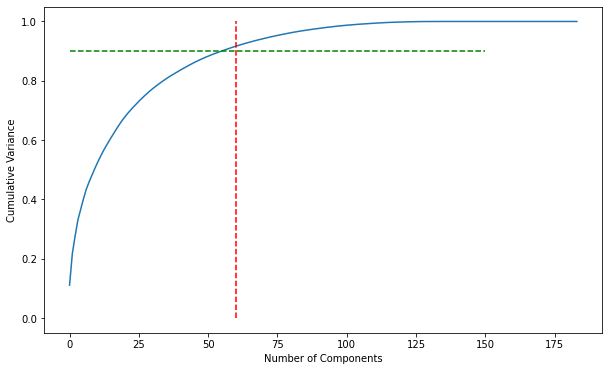

In [65]:
fig = plt.figure(figsize = (10,6))
plt.plot(var_cumu)
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=150, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

 As we can see, 60 features explain more than 90% of the variance, hence, we will proceed with 60 features

In [66]:
pca_final = IncrementalPCA(n_components=60)

In [67]:
X_train_pca = pca_final.fit_transform(X_train)

X_train_pca.shape

(38520, 60)

Applying the transformation on the test set

In [68]:
X_test_pca = pca_final.transform(X_test)

X_test_pca.shape

(9001, 60)

## Logistic Regression using PCA

In [69]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [70]:
# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [71]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(best_score)
print(best_C)

0.862905707093
1


In [72]:
# instantiating
logreg_pca = LogisticRegression(C = best_C)

In [73]:
# fitting the model
log_pca_model = logreg_pca.fit(X_train_pca,y_train)

In [74]:
y_train_pred = log_pca_model.predict(X_train_pca)

In [75]:
# creating a confusion matrix
confusion = metrics.confusion_matrix(y_train,y_train_pred)
print(confusion)

[[15803  3457]
 [ 2630 16630]]


In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Since we need to care more about churn cases than the not churn cases, the main goal is to retain the customers, who have the possibility to churn. There should not be a problem, if we consider a few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

In [77]:
print("Sensitivity:-",TP / float(TP+FN))
print('accuracy:-',metrics.accuracy_score(y_train,y_train_pred))

Sensitivity:- 0.8634475597092419
accuracy:- 0.8419781931464174


##### Predictions on a test set

In [78]:
y_test_pred = log_pca_model.predict(X_test_pca)

In [79]:
confusion = metrics.confusion_matrix(y_test,y_test_pred)
print(confusion)

[[6760 1540]
 [ 135  566]]


In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
print("Sensitivity:-",TP / float(TP+FN))
print('accuracy:-',metrics.accuracy_score(y_test,y_test_pred))

Sensitivity:- 0.8074179743223966
accuracy:- 0.8139095656038218


### Model Summary
##### training_data

In [82]:
# Sensitivity:- 0.8634475597092419
# accuracy:- 0.8419781931464174

##### T=test_data

In [83]:
# Sensitivity:- 0.8074179743223966
# accuracy:- 0.8139095656038218

##### As we can see, both the accuracy and the sensitivity of the train and test data are very close thus making this a good model

## Decision Tree Using PCA

##### Hyperparameter Tuning

In [84]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

In [85]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

In [86]:
# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [87]:
# Printing the optimal sensitivity score and hyperparameters
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.8415368639667706
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [88]:
# Model with optimal hyperparameters chosen from above
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

In [89]:
dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

##### Prediction on the train set

In [90]:
y_train_pred = dt_pca_model.predict(X_train_pca)

In [91]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16195  3065]
 [ 2176 17084]]


In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
print("Sensitivity:-",TP / float(TP+FN))
print('accuracy:-',metrics.accuracy_score(y_train,y_train_pred))

Sensitivity:- 0.8870197300103843
accuracy:- 0.8639408099688474


##### Prediction on a test set

In [94]:
y_test_pred = dt_pca_model.predict(X_test_pca)

In [95]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6735 1565]
 [ 183  518]]


In [96]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [97]:
print("Sensitivity:-",TP / float(TP+FN))
print('accuracy:-',metrics.accuracy_score(y_test,y_test_pred))

Sensitivity:- 0.738944365192582
accuracy:- 0.8057993556271525


### Model Summary
##### Train data

In [98]:
# Sensitivity:- 0.8870197300103843
# accuracy:- 0.8639408099688474

#### Test data

In [99]:
# Sensitivity:- 0.738944365192582
# accuracy:- 0.8057993556271525

While this model is good, it's still not better than the logistic regression model, which has better score in both accuracy and sensitivity

## Random Forest using PCA

#### Hyperparameter tuning

In [100]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

In [101]:
# instantiate the random forest classifier
rf = RandomForestClassifier()

In [102]:
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

In [103]:
# Fit the model

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [104]:
grid_search.best_score_

0.8339823468328141

In [105]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 300}

building a model using the best parameters derived from above.

In [106]:
rf_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             max_features=10,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=300)

In [107]:
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

##### Prediction on the train set

In [108]:
y_train_pred = rf_model.predict(X_train_pca)

In [109]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16365  2895]
 [ 3321 15939]]


In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
print("Sensitivity:-",TP / float(TP+FN))
print('accuracy:-',metrics.accuracy_score(y_train,y_train_pred))

Sensitivity:- 0.827570093457944
accuracy:- 0.8386292834890966


##### Prediction on the test set

In [112]:
y_test_pred = rf_model.predict(X_test_pca)

In [113]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7032 1268]
 [ 177  524]]


In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [115]:
print("Sensitivity:-",TP / float(TP+FN))
print('accuracy:-',metrics.accuracy_score(y_test,y_test_pred))

Sensitivity:- 0.7475035663338089
accuracy:- 0.8394622819686701


### Model Summary
#### train data

In [116]:
# Sensitivity:- 0.8262201453790239
# accuracy:- 0.8389927310488058

#### Test data

In [117]:
# Sensitivity:- 0.7489300998573466
# accuracy:- 0.8425730474391734

Again a good model but the performance is still not a good as the logistic regression model

## Final Model Selection Using PCA

As we can clearly see, the Logistic regression model has the best sensitivity, which is the most important metric in checking the model in this case. also, in this model the accuracy is fairly high. It also the model which will be least expensive computationally. 

##### Thus, Logistic Regression is the best choice

## Logistic Regression w/o PCA to find out the features

In [118]:
# instantiate logistic Regression
logreg = LogisticRegression()

### Using RFE for Feature Selection

In [119]:
# instantiate RFE with 15 features
rfe = RFE(logreg, n_features_to_select=15)

# fit the RFE
rfe = rfe.fit(X_train, y_train)

In [120]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 170),
 ('std_og_t2o_mou', False, 169),
 ('loc_ic_t2o_mou', False, 168),
 ('arpu_6', False, 92),
 ('arpu_7', False, 70),
 ('arpu_8', False, 105),
 ('onnet_mou_6', False, 46),
 ('onnet_mou_7', False, 44),
 ('onnet_mou_8', False, 122),
 ('offnet_mou_6', False, 75),
 ('offnet_mou_7', False, 32),
 ('offnet_mou_8', False, 30),
 ('roam_ic_mou_6', False, 62),
 ('roam_ic_mou_7', False, 140),
 ('roam_ic_mou_8', False, 136),
 ('roam_og_mou_6', False, 79),
 ('roam_og_mou_7', False, 29),
 ('roam_og_mou_8', False, 135),
 ('loc_og_t2t_mou_6', False, 48),
 ('loc_og_t2t_mou_7', False, 64),
 ('loc_og_t2t_mou_8', False, 128),
 ('loc_og_t2m_mou_6', False, 34),
 ('loc_og_t2m_mou_7', False, 33),
 ('loc_og_t2m_mou_8', False, 100),
 ('loc_og_t2f_mou_6', False, 159),
 ('loc_og_t2f_mou_7', False, 67),
 ('loc_og_t2f_mou_8', False, 139),
 ('loc_og_t2c_mou_6', False, 76),
 ('loc_og_t2c_mou_7', False, 78),
 ('loc_og_t2c_mou_8', False, 157),
 ('loc_og_mou_6', False, 88),
 ('loc_og_mou_7', 

In [121]:
# all the columns selected in RFE
col = X_train.columns[rfe.support_]
col

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_data_8',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'avg_rech_num_good'],
      dtype='object')

### Model 1

In [122]:
# adding the constant to X_train
X_train_sm_1 = sm.add_constant(X_train[col])

# instantiating the model
logreg_model_1 = sm.GLM(y_train, X_train_sm_1, family = sm.families.Binomial())

# fit and see the summary
logreg_model_1 = logreg_model_1.fit()
logreg_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38505
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Jun 2023   Deviance:                   2.4656e+05
Time:                        22:20:57   Pearson chi2:                 1.21e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.538e+15   4.84e+05   3.18e+09      0.000    1.54e+15    1.54e+15
total_rech_num_6  -3.875e+16   6.88e+06  -5.63e+09      0.000   -3.87e+16   -3.87e+16
total_rech_num_7  -3.655e+16   6.38e+06  -5.73e+09      0.000   -3.66e+16   -3.66e+16
total_rech_data_8 -5.892e+27   9.87e+19  -5.97e+07      0.000   -5.89e+27   -5.89e+27
count_rech_2g_8     4.97e+27   8.33e+19   5.97e+07      0.000    4.97e+27    4.97e+27
count_rech_3g_6    1.402e+15   1.96e+06   7.16e+08      0.000     1.4e+15     1.4e+15
count_rech_3g_7    1.453e+15   2.45e+06   5.92e+08      0.000    1.45e+15    1.45e+15
count_rech_3g_8     2.49e+27   4.17e+19   5.97e+07      0.000    2.49e+27    2.49e+27
sachet_2g_8        2.861e+14   1.97e+06   1.45e+08      0.000    2.86e+14    2.86e+14
monthly_3g_6      -6.101e+14   1.08e+06  -5.66e+08      0.000    -6.1e+14    -6.1e+14
monthly_3g_7       -6.46e+14   1.21e+06  -5.35e+08      0.000   -6.46e+14   -6.46e+14
monthly_3g_8      -9.022e+14   1.46e+06  -6.18e+08      0.000   -9.02e+14   -9.02e+14
sachet_3g_6       -1.084e+15   1.69e+06   -6.4e+08      0.000   -1.08e+15   -1.08e+15
sachet_3g_7       -1.206e+15   2.18e+06  -5.54e+08      0.000   -1.21e+15   -1.21e+15
sachet_3g_8       -1.295e+15   2.43e+06  -5.34e+08      0.000    -1.3e+15    -1.3e+15
avg_rech_num_good  6.692e+16   1.17e+07   5.71e+09      0.000    6.69e+16    6.69e+16
=====================================================================================
"""

The above model looks good since the P values are all 0. But to be sure, we need to check the VIF

#### Checking the VIF

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_rech_data_8,inf
3,count_rech_2g_8,inf
6,count_rech_3g_8,inf
14,avg_rech_num_good,1176.06
0,total_rech_num_6,399.68
1,total_rech_num_7,348.00
5,count_rech_3g_7,51.46
13,sachet_3g_8,50.34
12,sachet_3g_7,40.51
7,sachet_2g_8,33.08


In [124]:
# removing the column total_rech_data_8 which has infinite VIF value
col = col.drop('total_rech_data_8',1)
col

Index(['total_rech_num_6', 'total_rech_num_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'avg_rech_num_good'],
      dtype='object')

### Model 2

In [125]:
X_train_sm_1 = sm.add_constant(X_train[col])

logreg_model_2 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# fit and see the summary
logreg_model_2 = logreg_model_2.fit()
logreg_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38505
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Jun 2023   Deviance:                   2.2796e+05
Time:                        22:20:59   Pearson chi2:                 1.11e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.516e+15   3.42e+05   4.43e+09      0.000    1.52e+15    1.52e+15
total_rech_num_6  -5.565e+16   6.88e+06  -8.09e+09      0.000   -5.57e+16   -5.57e+16
total_rech_num_7  -5.242e+16   6.38e+06  -8.22e+09      0.000   -5.24e+16   -5.24e+16
count_rech_2g_8    6.155e+14   1.97e+06   3.13e+08      0.000    6.15e+14    6.15e+14
count_rech_3g_6    1.935e+15   1.96e+06   9.88e+08      0.000    1.93e+15    1.93e+15
count_rech_3g_7    1.895e+15   2.45e+06   7.73e+08      0.000     1.9e+15     1.9e+15
count_rech_3g_8    1.617e+15   2.87e+06   5.63e+08      0.000    1.62e+15    1.62e+15
sachet_2g_8       -6.111e+14   1.97e+06  -3.11e+08      0.000   -6.11e+14   -6.11e+14
monthly_3g_6      -8.451e+14   1.08e+06  -7.84e+08      0.000   -8.45e+14   -8.45e+14
monthly_3g_7      -8.175e+14   1.21e+06  -6.78e+08      0.000   -8.17e+14   -8.17e+14
monthly_3g_8      -8.576e+14   1.46e+06  -5.88e+08      0.000   -8.58e+14   -8.58e+14
sachet_3g_6       -1.535e+15   1.69e+06  -9.06e+08      0.000   -1.53e+15   -1.53e+15
sachet_3g_7        -1.64e+15   2.18e+06  -7.53e+08      0.000   -1.64e+15   -1.64e+15
sachet_3g_8       -1.413e+15   2.43e+06  -5.82e+08      0.000   -1.41e+15   -1.41e+15
avg_rech_num_good  9.617e+16   1.17e+07    8.2e+09      0.000    9.62e+16    9.62e+16
=====================================================================================
"""

#### Checking the VIF

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,avg_rech_num_good,1176.06
0,total_rech_num_6,405.01
1,total_rech_num_7,348.00
5,count_rech_3g_8,70.69
4,count_rech_3g_7,51.46
12,sachet_3g_8,50.34
11,sachet_3g_7,40.51
2,count_rech_2g_8,33.11
6,sachet_2g_8,33.08
3,count_rech_3g_6,32.79


So, as we can see, dropping the 'total_rech_data_8' column has reduced other the infinite values down. but, they are still considerably high. this time, we will drop the 'avg_rech_num_good' column

In [127]:
col = col.drop('avg_rech_num_good',1)
col

Index(['total_rech_num_6', 'total_rech_num_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

### Model 3

In [128]:
X_train_sm_1 = sm.add_constant(X_train[col])

logreg_model_3 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# fit and see the summary
logreg_model_3 = logreg_model_3.fit()
logreg_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38506
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17637.
Date:                Mon, 05 Jun 2023   Deviance:                       35273.
Time:                        22:21:00   Pearson chi2:                 1.63e+12
No. Iterations:                    50   Pseudo R-squ. (CS):             0.3754
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3072.4195   1.12e+05      0.028      0.978   -2.16e+05    2.22e+05
total_rech_num_6     0.3931      0.018     22.301      0.000       0.359       0.428
total_rech_num_7    -0.2483      0.017    -15.021      0.000      -0.281      -0.216
count_rech_2g_8     -1.7837      0.080    -22.290      0.000      -1.940      -1.627
count_rech_3g_6   2.384e+04   1.83e+06      0.013      0.990   -3.56e+06    3.61e+06
count_rech_3g_7   2.419e+04   2.36e+06      0.010      0.992   -4.61e+06    4.65e+06
count_rech_3g_8   2.292e+04   2.82e+06      0.008      0.994   -5.51e+06    5.55e+06
sachet_2g_8          0.4751      0.088      5.410      0.000       0.303       0.647
monthly_3g_6     -1.178e+04   9.04e+05     -0.013      0.990   -1.78e+06    1.76e+06
monthly_3g_7     -1.076e+04   1.05e+06     -0.010      0.992   -2.07e+06    2.05e+06
monthly_3g_8     -1.117e+04   1.37e+06     -0.008      0.994   -2.71e+06    2.68e+06
sachet_3g_6      -1.915e+04   1.47e+06     -0.013      0.990    -2.9e+06    2.86e+06
sachet_3g_7      -2.043e+04      2e+06     -0.010      0.992   -3.93e+06    3.89e+06
sachet_3g_8      -1.912e+04   2.35e+06     -0.008      0.994   -4.63e+06    4.59e+06
====================================================================================
"""

#### Checking the VIF

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,count_rech_3g_8,70.07
4,count_rech_3g_7,50.34
12,sachet_3g_8,49.89
11,sachet_3g_7,39.70
6,sachet_2g_8,33.04
2,count_rech_2g_8,32.98
3,count_rech_3g_6,31.71
10,sachet_3g_6,23.72
9,monthly_3g_8,17.96
8,monthly_3g_7,12.19


VIF has further reduced but it's still higher. And the P values have also increase. Next column to drop is the count_rech_3g_8 because it's p value and VIF are both very high

In [130]:
col = col.drop('count_rech_3g_8',1)
col

Index(['total_rech_num_6', 'total_rech_num_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8'],
      dtype='object')

### Model 4

In [131]:
X_train_sm_1 = sm.add_constant(X_train[col])

logreg_model_4 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# fit and see the summary
logreg_model_4 = logreg_model_4.fit()
logreg_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38507
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18238.
Date:                Mon, 05 Jun 2023   Deviance:                       36476.
Time:                        22:21:01   Pearson chi2:                 9.09e+12
No. Iterations:                    53   Pseudo R-squ. (CS):             0.3555
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3126.9035    1.1e+05      0.028      0.977   -2.13e+05    2.19e+05
total_rech_num_6     0.3655      0.017     21.150      0.000       0.332       0.399
total_rech_num_7    -0.2333      0.016    -14.376      0.000      -0.265      -0.202
count_rech_2g_8     -1.6582      0.077    -21.479      0.000      -1.809      -1.507
count_rech_3g_6   2.511e+04   1.82e+06      0.014      0.989   -3.54e+06    3.59e+06
count_rech_3g_7   3.614e+04   2.24e+06      0.016      0.987   -4.36e+06    4.43e+06
sachet_2g_8          0.5046      0.083      6.057      0.000       0.341       0.668
monthly_3g_6     -1.241e+04   8.99e+05     -0.014      0.989   -1.77e+06    1.75e+06
monthly_3g_7     -1.607e+04   9.97e+05     -0.016      0.987   -1.97e+06    1.94e+06
monthly_3g_8        -0.8732      0.036    -24.409      0.000      -0.943      -0.803
sachet_3g_6      -2.016e+04   1.46e+06     -0.014      0.989   -2.88e+06    2.84e+06
sachet_3g_7      -3.052e+04   1.89e+06     -0.016      0.987   -3.74e+06    3.68e+06
sachet_3g_8         -1.0279      0.081    -12.687      0.000      -1.187      -0.869
====================================================================================
"""

#### Checking the VIF

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,count_rech_3g_7,46.52
10,sachet_3g_7,37.28
5,sachet_2g_8,32.93
2,count_rech_2g_8,32.86
3,count_rech_3g_6,31.28
9,sachet_3g_6,23.46
7,monthly_3g_7,11.56
6,monthly_3g_6,9.55
8,monthly_3g_8,1.76
11,sachet_3g_8,1.64


Next, we drop the 'count_rech_3g_7'

In [133]:
col = col.drop('count_rech_3g_7',1)
col

Index(['total_rech_num_6', 'total_rech_num_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

### Model 5

In [134]:
X_train_sm_1 = sm.add_constant(X_train[col])

logreg_model_5 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# fit and see the summary
logreg_model_5 = logreg_model_5.fit()
logreg_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38508
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19799.
Date:                Mon, 05 Jun 2023   Deviance:                       39597.
Time:                        22:21:01   Pearson chi2:                 5.47e+09
No. Iterations:                    56   Pseudo R-squ. (CS):             0.3012
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3504.9256   9.92e+04      0.035      0.972   -1.91e+05    1.98e+05
total_rech_num_6     0.2630      0.016     16.400      0.000       0.232       0.294
total_rech_num_7    -0.1740      0.015    -11.368      0.000      -0.204      -0.144
count_rech_2g_8     -1.4597      0.072    -20.364      0.000      -1.600      -1.319
count_rech_3g_6   5.706e+04   1.61e+06      0.035      0.972   -3.11e+06    3.22e+06
sachet_2g_8          0.4382      0.076      5.735      0.000       0.288       0.588
monthly_3g_6     -2.819e+04   7.98e+05     -0.035      0.972   -1.59e+06    1.54e+06
monthly_3g_7        -0.0815      0.023     -3.619      0.000      -0.126      -0.037
monthly_3g_8        -0.9101      0.033    -27.961      0.000      -0.974      -0.846
sachet_3g_6      -4.581e+04    1.3e+06     -0.035      0.972   -2.59e+06     2.5e+06
sachet_3g_7          0.0857      0.032      2.708      0.007       0.024       0.148
sachet_3g_8         -1.0026      0.068    -14.689      0.000      -1.136      -0.869
====================================================================================
"""

#### Checking the VIF

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,sachet_2g_8,32.90
2,count_rech_2g_8,32.83
3,count_rech_3g_6,26.87
8,sachet_3g_6,20.65
5,monthly_3g_6,8.54
9,sachet_3g_7,2.49
6,monthly_3g_7,1.92
7,monthly_3g_8,1.75
10,sachet_3g_8,1.63
1,total_rech_num_7,1.60


Now, we drop the 'count_rech_3g_6' since it has a high p value and VIF

In [136]:
col = col.drop('count_rech_3g_6',1)
col

Index(['total_rech_num_6', 'total_rech_num_7', 'count_rech_2g_8',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

### Model 6

In [137]:
X_train_sm_1 = sm.add_constant(X_train[col])

logreg_model_6 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# fit and see the summary
logreg_model_6 = logreg_model_6.fit()
logreg_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38509
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23092.
Date:                Mon, 05 Jun 2023   Deviance:                       46184.
Time:                        22:21:02   Pearson chi2:                 2.02e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1708
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1925      0.013    -14.915      0.000      -0.218      -0.167
total_rech_num_6     0.3016      0.016     19.188      0.000       0.271       0.332
total_rech_num_7    -0.2417      0.015    -16.366      0.000      -0.271      -0.213
count_rech_2g_8     -1.2283      0.065    -18.987      0.000      -1.355      -1.102
sachet_2g_8          0.2321      0.069      3.367      0.001       0.097       0.367
monthly_3g_6         0.0557      0.016      3.445      0.001       0.024       0.087
monthly_3g_7        -0.0195      0.019     -1.031      0.302      -0.057       0.018
monthly_3g_8        -0.8353      0.026    -32.217      0.000      -0.886      -0.785
sachet_3g_6          0.0648      0.021      3.122      0.002       0.024       0.106
sachet_3g_7          0.2310      0.026      9.026      0.000       0.181       0.281
sachet_3g_8         -0.7230      0.040    -17.918      0.000      -0.802      -0.644
====================================================================================
"""

#### Checking the VIF

In [138]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,sachet_2g_8,32.90
2,count_rech_2g_8,32.83
8,sachet_3g_7,2.48
7,sachet_3g_6,2.03
5,monthly_3g_7,1.92
6,monthly_3g_8,1.74
9,sachet_3g_8,1.62
1,total_rech_num_7,1.59
4,monthly_3g_6,1.56
0,total_rech_num_6,1.55


Next, we drop monthly_3g_7 because of it's high p-value

In [139]:
col = col.drop('monthly_3g_7',1)
col

Index(['total_rech_num_6', 'total_rech_num_7', 'count_rech_2g_8',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

### Model 7

In [140]:
X_train_sm_1 = sm.add_constant(X_train[col])

logreg_model_7 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# fit and see the summary
logreg_model_7 = logreg_model_7.fit()
logreg_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38510
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23092.
Date:                Mon, 05 Jun 2023   Deviance:                       46185.
Time:                        22:21:02   Pearson chi2:                 2.00e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1708
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1925      0.013    -14.917      0.000      -0.218      -0.167
total_rech_num_6     0.3035      0.016     19.444      0.000       0.273       0.334
total_rech_num_7    -0.2425      0.015    -16.438      0.000      -0.271      -0.214
count_rech_2g_8     -1.2289      0.065    -18.996      0.000      -1.356      -1.102
sachet_2g_8          0.2333      0.069      3.384      0.001       0.098       0.368
monthly_3g_6         0.0497      0.015      3.299      0.001       0.020       0.079
monthly_3g_8        -0.8450      0.024    -34.856      0.000      -0.893      -0.797
sachet_3g_6          0.0649      0.021      3.125      0.002       0.024       0.106
sachet_3g_7          0.2313      0.026      9.040      0.000       0.181       0.281
sachet_3g_8         -0.7242      0.040    -17.948      0.000      -0.803      -0.645
====================================================================================
"""

#### Checking the VIF

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,sachet_2g_8,32.90
2,count_rech_2g_8,32.83
7,sachet_3g_7,2.48
6,sachet_3g_6,2.03
8,sachet_3g_8,1.62
1,total_rech_num_7,1.58
0,total_rech_num_6,1.54
4,monthly_3g_6,1.36
5,monthly_3g_8,1.35


dropping sachet_2g_8 this time because of it's high VIF

In [142]:
col = col.drop('sachet_2g_8',1)
col

Index(['total_rech_num_6', 'total_rech_num_7', 'count_rech_2g_8',
       'monthly_3g_6', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8'],
      dtype='object')

### Model 8

In [143]:
X_train_sm_1 = sm.add_constant(X_train[col])

logreg_model_8 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# fit and see the summary
logreg_model_8 = logreg_model_8.fit()
logreg_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38511
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23098.
Date:                Mon, 05 Jun 2023   Deviance:                       46196.
Time:                        22:21:02   Pearson chi2:                 2.46e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1706
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1980      0.013    -15.384      0.000      -0.223      -0.173
total_rech_num_6     0.3073      0.016     19.718      0.000       0.277       0.338
total_rech_num_7    -0.2413      0.015    -16.361      0.000      -0.270      -0.212
count_rech_2g_8     -1.0270      0.025    -41.797      0.000      -1.075      -0.979
monthly_3g_6         0.0495      0.015      3.289      0.001       0.020       0.079
monthly_3g_8        -0.8408      0.024    -34.773      0.000      -0.888      -0.793
sachet_3g_6          0.0646      0.021      3.109      0.002       0.024       0.105
sachet_3g_7          0.2293      0.026      8.968      0.000       0.179       0.279
sachet_3g_8         -0.7145      0.040    -17.808      0.000      -0.793      -0.636
====================================================================================
"""

The P-values look fine but let's check the VIF values

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,sachet_3g_7,2.48
5,sachet_3g_6,2.03
7,sachet_3g_8,1.61
1,total_rech_num_7,1.58
0,total_rech_num_6,1.53
3,monthly_3g_6,1.36
4,monthly_3g_8,1.35
2,count_rech_2g_8,1.08


 All the VIF values are low so I think this will be the final model. Time for the next step

### running this model on the train data

In [145]:
y_train_pred = logreg_model_8.predict(X_train_sm_1)
y_train_pred.head()

0    0.649609
1    0.560235
2    0.061996
3    0.601571
4    0.017266
dtype: float64

In [146]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'Churn_prob':y_train_pred})
y_train_pred_final['cust_num'] = y_train.index
y_train_pred_final.head()

,churn,Churn_prob,cust_num
0,1,0.649609,0
1,0,0.560235,1
2,0,0.061996,2
3,0,0.601571,3
4,0,0.017266,4


In [147]:
# mapping the churn probablity into 0 and 1 around 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,Churn_prob,cust_num,Predicted
0,1,0.649609,0,1
1,0,0.560235,1,1
2,0,0.061996,2,0
3,0,0.601571,3,1
4,0,0.017266,4,0


In [148]:
# Checking the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.churn,y_train_pred_final.Predicted)
print(confusion)

[[10127  9133]
 [ 2827 16433]]


In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
print("Sensitivity:-",TP / float(TP+FN))
print('accuracy:-',metrics.accuracy_score(y_train_pred_final.churn,y_train_pred_final.Predicted))

Sensitivity:- 0.8532191069574248
accuracy:- 0.6895119418483905


So, this model has performed well in the training set. the sensitivity and accuracy are both high

In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.Churn_prob, drop_intermediate = False )

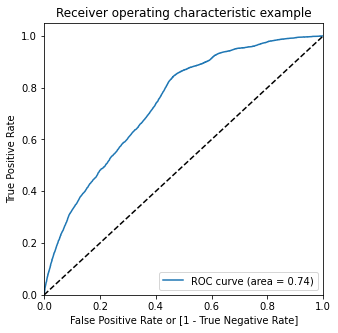

In [152]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.Churn_prob)

### Finding Optimal cutoff point

#### Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [153]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,Churn_prob,cust_num,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.649609,0,1,1,1,1,1,1,1,1,0,0,0
1,0,0.560235,1,1,1,1,1,1,1,1,0,0,0,0
2,0,0.061996,2,0,1,0,0,0,0,0,0,0,0,0
3,0,0.601571,3,1,1,1,1,1,1,1,1,0,0,0
4,0,0.017266,4,0,1,0,0,0,0,0,0,0,0,0


In [154]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.567809  0.987227  0.148390
0.2   0.2  0.592913  0.973468  0.212357
0.3   0.3  0.635514  0.945691  0.325337
0.4   0.4  0.656931  0.920924  0.392939
0.5   0.5  0.689512  0.853219  0.525805
0.6   0.6  0.648105  0.558619  0.737591
0.7   0.7  0.541044  0.101869  0.980218
0.8   0.8  0.510177  0.022741  0.997612
0.9   0.9  0.502596  0.005763  0.999429


#### plot accuracy sensitivity and specificity for various probabilities.

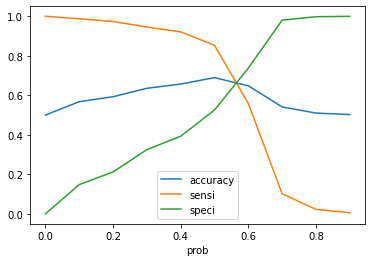

In [155]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above graph, it looks like the optimal cutoff point is around 5.5

In [156]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

,churn,Churn_prob,cust_num,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.649609,0,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.560235,1,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.061996,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.601571,3,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.017266,4,0,1,0,0,0,0,0,0,0,0,0,0


In [157]:
# check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.final_predicted)

0.6767133956386293

In [158]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[11152,  8108],
       [ 4345, 14915]], dtype=int64)

In [159]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [160]:
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.7744029075804777


### Precision and Recall Trade-off

In [161]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.Churn_prob)

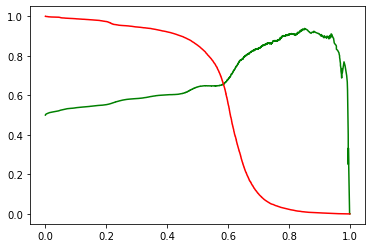

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Running the model on the test set

In [163]:
 X_test = X_test[col]
X_test.head()

,total_rech_num_6,total_rech_num_7,count_rech_2g_8,monthly_3g_6,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
7526,-0.570602,0.067453,-0.39082,-0.311308,1.802985,-0.201011,-0.175489,-0.142114
74907,-1.172230,-0.574498,-0.39082,1.494383,-0.259527,-0.201011,-0.175489,-0.142114
99617,-0.570602,-0.681490,-0.39082,-0.311308,-0.259527,-0.201011,-0.175489,-0.142114
83565,-0.771145,-0.146531,-0.39082,-0.311308,1.802985,-0.201011,-0.175489,-0.142114
8695,-0.670873,-0.574498,-0.39082,1.494383,1.802985,0.910201,-0.175489,-0.142114


In [164]:
X_test_sm = sm.add_constant(X_test)

### Making Predictions

In [165]:
y_test_pred = logreg_model_8.predict(X_test_sm)
y_test_pred[:10]

7526     0.186746
74907    0.579883
99617    0.609134
83565    0.185233
8695     0.233950
28420    0.594163
16974    0.586917
25876    0.538059
37658    0.545000
63765    0.020955
dtype: float64

#### Converting y_pred to a dataframe

In [166]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7526,0.186746
74907,0.579883
99617,0.609134
83565,0.185233
8695,0.233950


#### Converting y_test to dataframe and adding the cust_num

In [167]:
y_test_df = pd.DataFrame(y_test)

In [168]:
y_test_df['cust_num'] = y_test_df.index

#### Removing index for both dataframes to append them side by side 

In [169]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,churn,cust_num,0
7526,0,7526,0.186746
74907,1,74907,0.579883
99617,0,99617,0.609134
83565,0,83565,0.185233
8695,0,8695,0.233950


#### rename the column 0 as Churn_prob

In [170]:
y_pred_final = y_pred_final.rename(columns={0:'Churn_prob'})

In [171]:
# rearrange the columns
y_pred_final = y_pred_final[['cust_num','churn','Churn_prob']]

### making the 'final_predicted' based on the converted prob of .55

In [172]:
y_pred_final['final_predicted'] = y_pred_final.Churn_prob.map(lambda x: 1 if x > 0.55 else 0)

In [173]:
y_pred_final.head()

,cust_num,churn,Churn_prob,final_predicted
7526,7526,0,0.186746,0
74907,74907,1,0.579883,1
99617,99617,0,0.609134,1
83565,83565,0,0.185233,0
8695,8695,0,0.233950,0


In [174]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.6020442173091879

#### as seen, the accuracy on the test model is very close to the accuracy on the train model.

## Confusion matrix


In [175]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn,y_pred_final.final_predicted)
confusion2

array([[4870, 3430],
       [ 152,  549]], dtype=int64)

In [176]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [177]:
print('sensitivity:-',TP / float(TP+FN))

sensitivity:- 0.7831669044222539


### Checking other metrics 


In [178]:
# calculate specificity
TN / float(TN+FP)

0.5867469879518072

In [179]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.41325301204819276


## Model Summary
#### Train data

In [180]:
# accuracy:- 0.6767133956386293
# Sensitivity:- 0.7744029075804777

#### Test data

In [181]:
# accuracy:- 0.6020442173091879
# sensitivity:- 0.7831669044222539

# Final Observations

In [182]:
# Checking the parameters and their value to the model
logreg_model_8.params.sort_values(ascending=False)

total_rech_num_6    0.307304
sachet_3g_7         0.229286
sachet_3g_6         0.064557
monthly_3g_6        0.049466
const              -0.197962
total_rech_num_7   -0.241318
sachet_3g_8        -0.714488
monthly_3g_8       -0.840838
count_rech_2g_8    -1.027026
dtype: float64

## Plots of the important parameters

In [183]:
# creating a churn dataframe
df_churn = df[df['churn']==1]
# creating a not churn dataframe
df_not_churn = df[df['churn']==0]

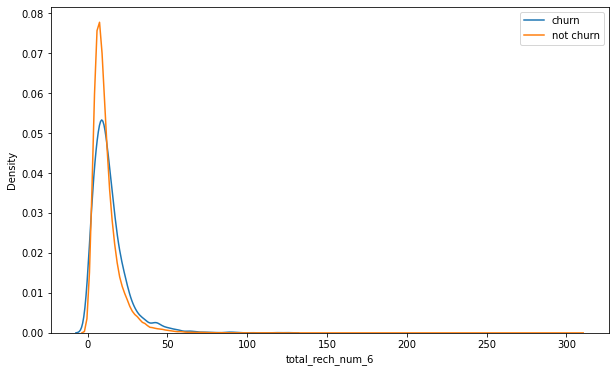

In [184]:
# creating distplot of the total number of recharges done in the month of June
fig = plt.figure(figsize=(10,6))
sns.distplot(df_churn['total_rech_num_6'],label='churn',hist=False)
sns.distplot(df_not_churn['total_rech_num_6'],label='not churn',hist=False)
plt.legend()
plt.show()

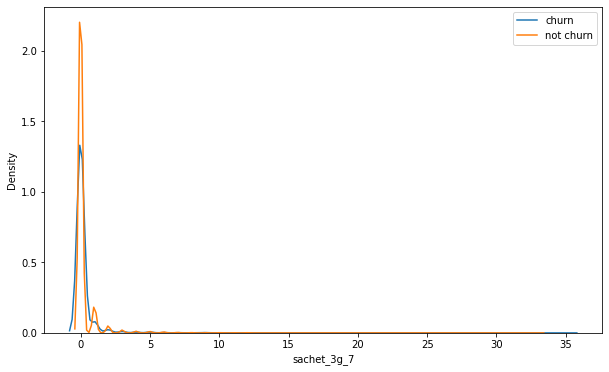

In [185]:
# creating distplot of the sachet_3g in the month of July
fig = plt.figure(figsize=(10,6))
sns.distplot(df_churn['sachet_3g_7'],label='churn',hist=False)
sns.distplot(df_not_churn['sachet_3g_7'],label='not churn',hist=False)
plt.legend()
plt.show()

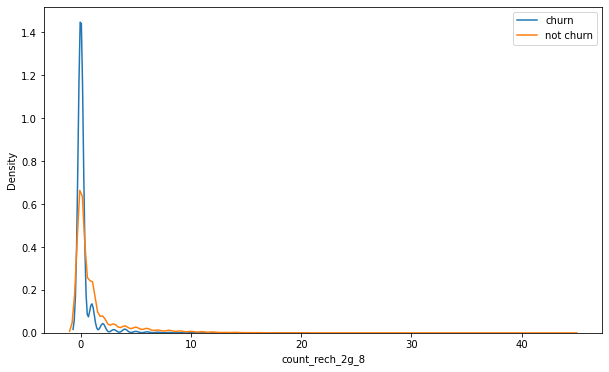

In [186]:
# creating distplot of count recharge 2g in the month of August
fig = plt.figure(figsize=(10,6))
sns.distplot(df_churn['count_rech_2g_8'],label='churn',hist=False)
sns.distplot(df_not_churn['count_rech_2g_8'],label='not churn',hist=False)
plt.legend()
plt.show()

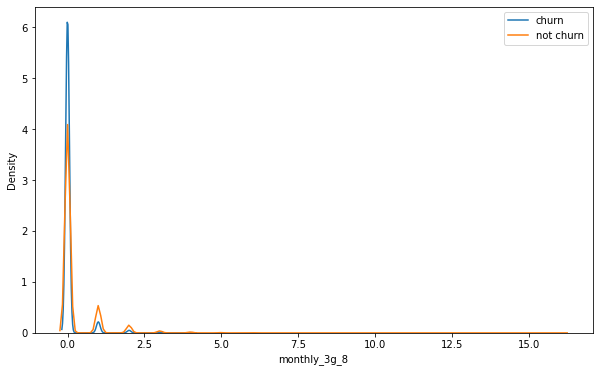

In [187]:
# creating distplot of monthly 3g in the month of August
fig = plt.figure(figsize=(10,6))
sns.distplot(df_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(df_not_churn['monthly_3g_8'],label='not churn',hist=False)
plt.legend()
plt.show()


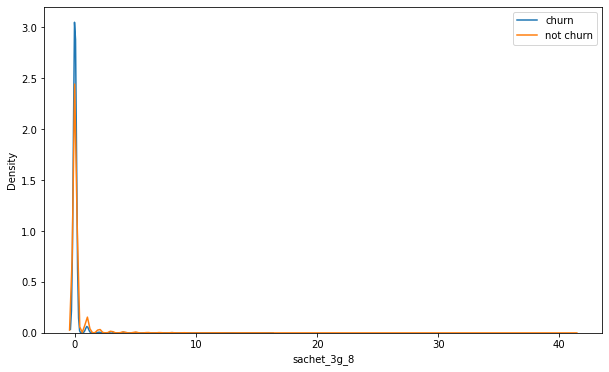

In [188]:
# creating distplot of sachet_3g in the month of August
fig = plt.figure(figsize=(10,6))
sns.distplot(df_churn['sachet_3g_8'],label='churn',hist=False)
sns.distplot(df_not_churn['sachet_3g_8'],label='not churn',hist=False)
plt.legend()
plt.show()

I have displayed 5 most important features in the form of distplot. 2 of them have a positive value and while 3 of them have a negative

## Recommendation

1. Customers who churned had lower number of recharge in month of June. So, it would be a good idea to send them promotion offers with low price and high return.
2. Customers who churned had lower sachets_3g in the month of July. I would suggest that the company give them a limited amount of additional data free of charge for a week before sending them offers at lower price to buy the monthly plans.
3. Customers who churned had a higher count_recharge_2g. One can assume that they churned because the speed of 2g data is very slow. Thus, I would suggest to talk to them and inform them about 3g speed as well as give them promotional offers for a while before slowly bringing them up to the regular prices.
4. Customers who buy a monthly 3g plan in the month of August are very likely to chrun. Thus, the only option would be to contact them and see if the company can offer better service. They can also be sent some special offers under a loyalty program to keep the customer satisfied.
5. Customers who had sachet_3g in the month of August are Likely to Churn. The company can offer them discounts to switch them to monthly packs and contact them to see if the service can be improved